In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from preprocess import *
from scipy.cluster.hierarchy import linkage as link
from scipy.cluster.hierarchy import dendrogram as dendo
from sklearn.cluster import KMeans as kmeans
from sklearn.metrics.cluster import contingency_matrix as ct


In [4]:
df = pd.read_csv("Murder_Data/SHR76_20.csv")

# Feature Cleaning
df.insert(1, 'County', df['CNTYFIPS'].map(lambda x : str(x).split(',')[0]), True)
df.drop("CNTYFIPS",axis = 1, inplace= True) # redundant, onlyy keeping the county part
df.drop("StateName",axis = 1, inplace= True)  # redundant, contains state
df.drop("Ori",axis = 1, inplace= True)  # redundant, contains state + county + agentcy nb
df.insert(3, 'Area',df['MSA'].map(lambda x :  str(x).split(',')[0] ) ,True)
df.drop('MSA',axis = 1,inplace=True) # rendundant only the state, keeping the metropolitant statistical area

df.drop("FileDate",axis = 1,inplace = True)

df.drop("Incident",axis = 1,inplace = True) # incient number of the month, for a specific county useless for our application

df.drop("Situation",axis = 1,inplace = True) # redundant, info already contained in OffCount and VicCount

df.drop("Source",axis = 1,inplace = True)
df.drop("ID",axis = 1,inplace = True)

# Values cleaning
df['OffAge'].replace(999, np.NaN, inplace=True) # replacing 999 ages with Nan
df = df[df["Agentype"]!='4'] # removing 4 4s typo?

C:\Users\louis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df_sub = df

print(len(df_sub))
df_sub_full = df_sub.dropna()
print(len(df_sub_full))

for col in df_sub.columns:
    try:
        df_sub_full = df_sub_full[df_sub_full[col].str.contains("nknown|undetermined|not specified",regex = True)==False]
    except:
            a=0
print(len(df_sub_full))

827215
27453
12786


In [6]:
df_numeric = df_sub_full.copy(deep=True)

for col in df_sub_full.columns:
  # if(col in ['File Month','File Year','File Day']):
  #   df_numeric[col] = pd.to_numeric(df[col])
  #   print(col)
  if df[col].dtype == 'object':
    labels = df_numeric[col].unique().tolist()
    mapping = dict( zip(labels,range(len(labels))) )
    df_numeric.replace({col: mapping},inplace=True)

In [20]:
methods = ["single","average","complete"]

def exp_2(m):
    clusters = link(df_numeric, method = m,metric = 'jaccard')
    dendo(clusters, p=3,truncate_mode='level', count_sort=True,get_leaves =True,  leaf_rotation = -80)  

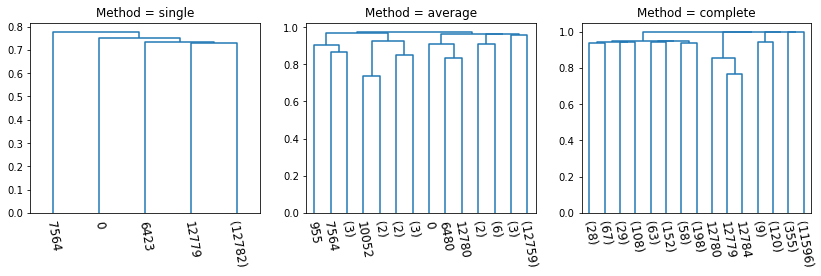

In [21]:
fig = plt.figure(figsize=(14, 3.5))

for i in range(len(methods)):
    ax = fig.add_subplot(1, 3, i+1)
    exp_2(methods[i])
    plt.title("Method = "+methods[i])

In [30]:
sses = []

for i in range(1,11):
    
    model = kmeans(n_clusters = i,random_state= 4,metric = "jaccard").fit(df_numeric)
    clusters = model.labels_
    sses.append(model.inertia_)
    
plt.figure(figsize=(3,3))
plt.plot(range(1,11),sses)
plt.title("SEE increase of K")


TypeError: __init__() got an unexpected keyword argument 'metric'

In [29]:
model = kmeans(n_clusters = 3,random_state= 4).fit(df_numeric)
print(model.cluster_centers_)


[[8.07058344e+01 4.53666884e+00 3.73057366e+01 2.23524446e+02
  8.40123859e-01 5.69206141e-19 2.00066900e+03 5.57724902e+00
  4.25358540e-01 0.00000000e+00 3.64977184e+01 2.99869622e-02
  3.87711864e-01 3.48109518e-01 3.49535528e+01 5.58996089e-02
  2.36962190e-01 2.38754889e-01 7.29465450e-01 1.41427640e+00
  5.92405476e-01 1.40140156e+00 3.03129074e-02 2.40384615e-01]
 [5.18879279e+02 4.01783784e+01 2.34173488e+02 1.34857503e+03
  9.01930502e-01 1.02999206e-18 2.00144402e+03 5.48030888e+00
  2.65637066e-01 0.00000000e+00 3.87680824e+01 2.54826255e-02
  4.81853282e-01 2.12355212e-01 3.52792793e+01 7.18146718e-02
  3.35392535e-01 1.60360360e-01 8.03346203e-01 1.13822394e+00
  4.53281853e-01 1.13256113e+00 4.76190476e-02 1.76061776e-01]
 [2.71626040e+02 2.15124774e+01 1.40919711e+02 7.76481736e+02
  1.24122966e+00 3.61663653e-04 1.99983363e+03 5.64665461e+00
  2.24593128e-01 0.00000000e+00 3.54665461e+01 3.07414105e-02
  6.09764919e-01 9.51175407e-02 3.50538879e+01 9.22242315e-02
  3.96